#Feature Pipeline


Dataset used: Google Open Image Dataset

https://github.com/cvdfoundation/open-images-dataset#download-full-dataset-with-google-storage-transfer

https://storage.googleapis.com/openimages/web/download.html

## Setting up the environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 5.2 MB/s 
     |████████████████████████████████| 79 kB 9.1 MB/s 
     |████████████████████████████████| 662 kB 65.5 MB/s 
     |████████████████████████████████| 548 kB 53.6 MB/s 
     |████████████████████████████████| 10.3 MB 60.3 MB/s 
     |████████████████████████████████| 140 kB 58.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:


## Downloading a part of the train set and the validation set

In [ ]:
!aws s3 --no-sign-request cp s3://open-images-dataset/tar/train_0.tar.gz train0

download: s3://open-images-dataset/tar/train_0.tar.gz to ./train0   


In [ ]:
!tar -xf train0

In [ ]:
!rm train0

In [ ]:
!aws s3 --no-sign-request cp s3://open-images-dataset/tar/validation.tar.gz validation

download: s3://open-images-dataset/tar/validation.tar.gz to ./validation


In [ ]:
!tar -xf validation

In [ ]:
!rm validation

## Moving the data into different folders


It is required for autoencoders when using Tensorflow Image Generator

In [ ]:
!mkdir train
!mv train_0/ train/images

In [ ]:
!mv validation/ images/
!mkdir validation
!mv images/ validation/images

 ## Inspecting the data

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = "train/images"
images = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
print(len(images))

156541


In [ ]:
from PIL import Image

im = Image.open(mypath + "/"+ images[0])

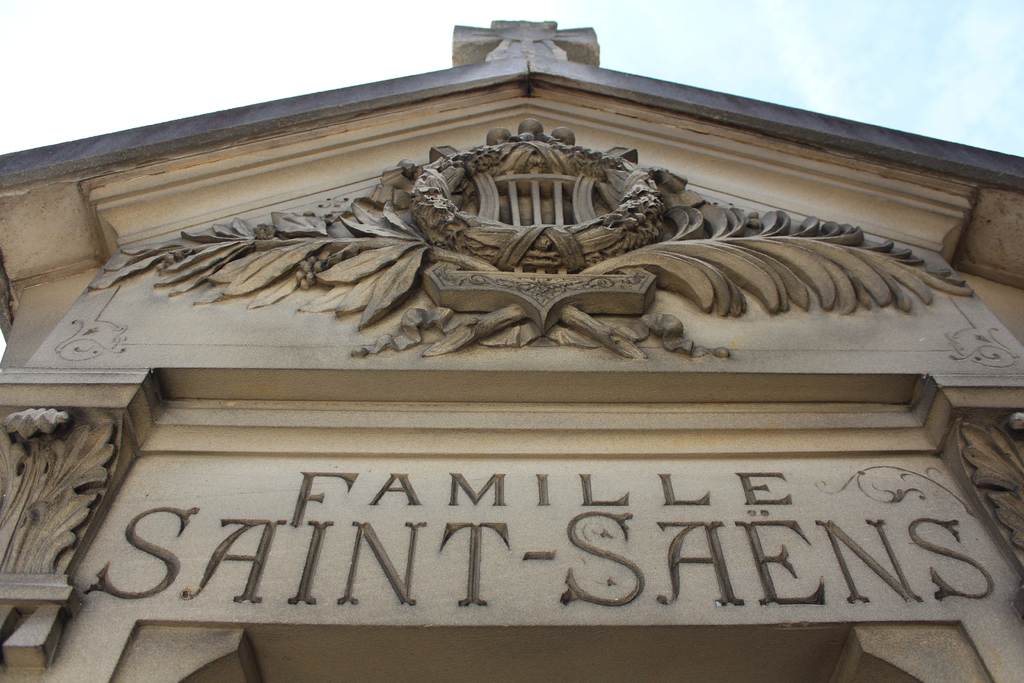

In [ ]:
im

In [ ]:
im.size

(1024, 683)

In [ ]:
i = 0
min_height = 1024
min_width = 1024
sizelist = []
for name in images:
  im = Image.open(mypath+"/"+name)
  size = im.size
  sizelist.append(size)
  if size[0]<min_height:
    min_height = size[0]
  if size[1]<min_width:
    min_width = size[1]

In [ ]:
print(min_height,min_width)

271 257


41620


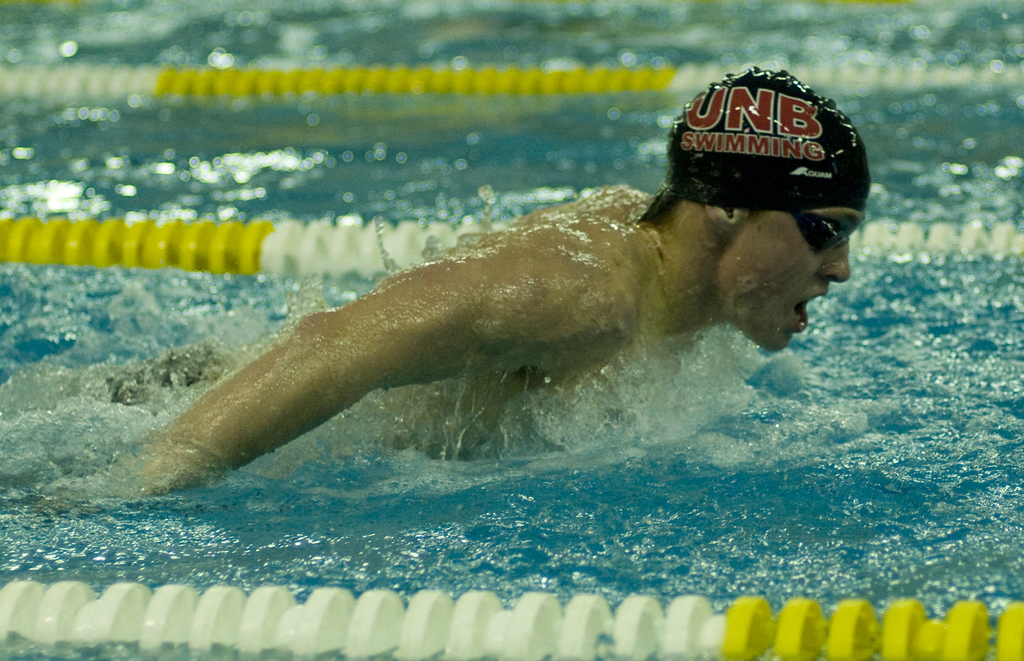

In [ ]:
mypath = "validation/images"
images = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(images)) #41620
im = Image.open(mypath + "/"+ images[0])
im

In [ ]:
i = 0
min_height = 1024
min_width = 1024
sizelist = []
for name in images:
  im = Image.open(mypath+"/"+name)
  size = im.size
  sizelist.append(size)
  if size[0]<min_height:
    min_height = size[0]
  if size[1]<min_width:
    min_width = size[1]
print(min_height,min_width)

296 259


## Moving the images on Google Drive

It was not possible since there are problems with the synchronization of Colab's VM and Google Drive when many files are involved.

In [ ]:
!mv train/ drive/MyDrive/ScalableMLDL/Progetto/train0

In [ ]:
!mv validation/ drive/MyDrive/ScalableMLDL/Progetto/validation

In [ ]:
mypath = "drive/MyDrive/ScalableMLDL/Progetto/train0/images"
images = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(images))

156541


In [ ]:
mypath = "drive/MyDrive/ScalableMLDL/Progetto/validation/images"
images = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(images))

41620


In [ ]:
drive.flush_and_unmount()
# It was not yet finished after more than one night